# YoloV8-OBB + SAM

In [1]:
# Mount Drive Folder to Colab [Local]
from google.colab import drive
drive.mount("/content/gdrive")

!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/learnings/learn Semantic Segmentation
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/learnings/learn Semantic Segmentation
datasets			     SAM_Seg.ipynb	   yolo_sam.ipynb
imgDataSet			     sam_vit_h_4b8939.pth  yolov8n.pt
learn_yolov8_sem_segmantation.ipynb  yolo11n.pt		   yolov8_obb_sam.ipynb
runs				     yolo_obb_sam.ipynb


In [2]:
!nvidia-smi

Fri Jul  4 06:55:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Requirements

In [ ]:
# Download SAM weights (ViT-H)
# !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [4]:
# For SAM
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-9zh27jfy
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-9zh27jfy
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=7e1a9eee73bb995274766ebcddb4d9cd3e1c31c4827d9d599c61d8cb94269413
  Stored in directory: /tmp/pip-ephem-wheel-cache-t2bci_xm/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [5]:
# Libraries
import os
import sys
import cv2 as cv
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
import ultralytics
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Plotter
def display_detected_images(images, subtitles=None):
  n = len(images)
  fig, axs = plt.subplots(1, n, figsize=(8 * n, 5))
  if n == 1:
    axs = [axs]
  for i, img in enumerate(images):
      axs[i].imshow(img)
      axs[i].axis('off')
      if subtitles:
        axs[i].set_title(subtitles[i], fontsize=20)
      elif len(subtitles) < n:
        axs[i].set_title("Unknown", fontsize=20)
      else:
        axs[i].set_title("Unknown", fontsize=20)

  plt.tight_layout()
  plt.show()

---
# Actual Codes Begin
---

---
# Train Model
---

In [ ]:
# Train YOLO
epochs = 30
classNames = ["Equipments"]

data_yaml = "/content/gdrive/MyDrive/learnings/learn Semantic Segmentation/datasets/equipmentsOBB/data.yaml"

model = YOLO('yolov8n-obb.pt')
train_model = model.train(data=data_yaml, epochs=epochs, imgsz=640)

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/learnings/learn Semantic Segmentation/datasets/equipmentsOBB/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=

train: Scanning /content/gdrive/MyDrive/learnings/learn Semantic Segmentation/datasets/equipmentsOBB/train/labels.cache... 325 images, 0 backgrounds, 0 corrupt: 100%|██████████| 325/325 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.8±2.9 ms, read: 96.7±27.8 MB/s, size: 444.0 KB)


val: Scanning /content/gdrive/MyDrive/learnings/learn Semantic Segmentation/datasets/equipmentsOBB/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.54G      1.474      2.197      1.693         25        640: 100%|██████████| 21/21 [00:14<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         31         86      0.998          1      0.995      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.54G      1.041     0.9107      1.522         37        640: 100%|██████████| 21/21 [00:09<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         31         86          1      0.998      0.995      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.54G     0.9602     0.7322      1.467         24        640: 100%|██████████| 21/21 [00:09<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         31         86      0.989          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.54G     0.8986     0.6248      1.443         11        640: 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         31         86      0.999          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.54G     0.8448     0.5788      1.394         39        640: 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         31         86      0.998          1      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.54G     0.8361      0.558      1.383         26        640: 100%|██████████| 21/21 [00:09<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         31         86      0.999          1      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.54G     0.8034      0.527      1.365         30        640: 100%|██████████| 21/21 [00:10<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         31         86      0.999          1      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.54G     0.8243     0.5168      1.384         23        640: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         31         86      0.999          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.54G     0.7885     0.5024      1.351         39        640: 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         31         86      0.988          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.54G     0.7744     0.4931      1.338         38        640: 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         31         86      0.988          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.54G     0.7555      0.486      1.361         22        640: 100%|██████████| 21/21 [00:10<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         31         86          1      0.997      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.54G     0.7583     0.4876      1.399         25        640: 100%|██████████| 21/21 [00:10<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         31         86      0.999          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.54G      0.778     0.4882      1.328         33        640: 100%|██████████| 21/21 [00:09<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         31         86      0.999          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.55G     0.7239     0.4654      1.311         39        640: 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         31         86      0.999          1      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.55G     0.6909     0.4417      1.287         40        640: 100%|██████████| 21/21 [00:09<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         31         86          1      0.998      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.55G      0.699      0.442       1.26         40        640: 100%|██████████| 21/21 [00:09<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         31         86      0.999          1      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.55G     0.7203     0.4537      1.336         29        640: 100%|██████████| 21/21 [00:09<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         31         86      0.999          1      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.55G     0.6881     0.4374      1.284         38        640: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         31         86      0.999          1      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.55G     0.6909     0.4402      1.288         30        640: 100%|██████████| 21/21 [00:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         31         86      0.999          1      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.55G     0.6779     0.4362      1.277         35        640: 100%|██████████| 21/21 [00:09<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         31         86      0.999          1      0.995      0.869


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.55G     0.5509     0.3487      1.217         14        640: 100%|██████████| 21/21 [00:13<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         31         86      0.999          1      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.55G     0.5609     0.3683      1.216         14        640: 100%|██████████| 21/21 [00:09<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         31         86      0.999          1      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.55G     0.5332     0.3407      1.181         14        640: 100%|██████████| 21/21 [00:08<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         31         86          1          1      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.55G     0.5322     0.3368      1.165         15        640: 100%|██████████| 21/21 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]

                   all         31         86      0.999          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.55G     0.5204     0.3408      1.186         15        640: 100%|██████████| 21/21 [00:09<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         31         86      0.999          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.55G     0.5079     0.3275      1.154         15        640: 100%|██████████| 21/21 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         31         86      0.999          1      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.55G     0.5047     0.3268       1.17         15        640: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]


                   all         31         86      0.999          1      0.995      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.55G     0.5018     0.3207       1.17         11        640: 100%|██████████| 21/21 [00:08<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         31         86      0.999          1      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.55G     0.4912     0.3185       1.15         12        640: 100%|██████████| 21/21 [00:09<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         31         86      0.999          1      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.55G     0.4823     0.3161      1.152         15        640: 100%|██████████| 21/21 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         31         86      0.999          1      0.995      0.899



30 epochs completed in 0.095 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/obb/train/weights/best.pt, 6.5MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-obb summary (fused): 81 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]


                   all         31         86      0.999          1      0.995      0.904
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to runs/obb/train


---

# Yolo Model Testing

---

In [7]:
test_images = [os.path.join("datasets/equipmentsOBB/test/images", image) for image in os.listdir("datasets/equipmentsOBB/test/images")]

yolov8_model = YOLO("/content/gdrive/MyDrive/learnings/learn Semantic Segmentation/runs/obb/train/weights/best.pt")

-------------------- 
Binary Object Detection - YOLOv8 
--------------------
Test Images: 1 
--------------------


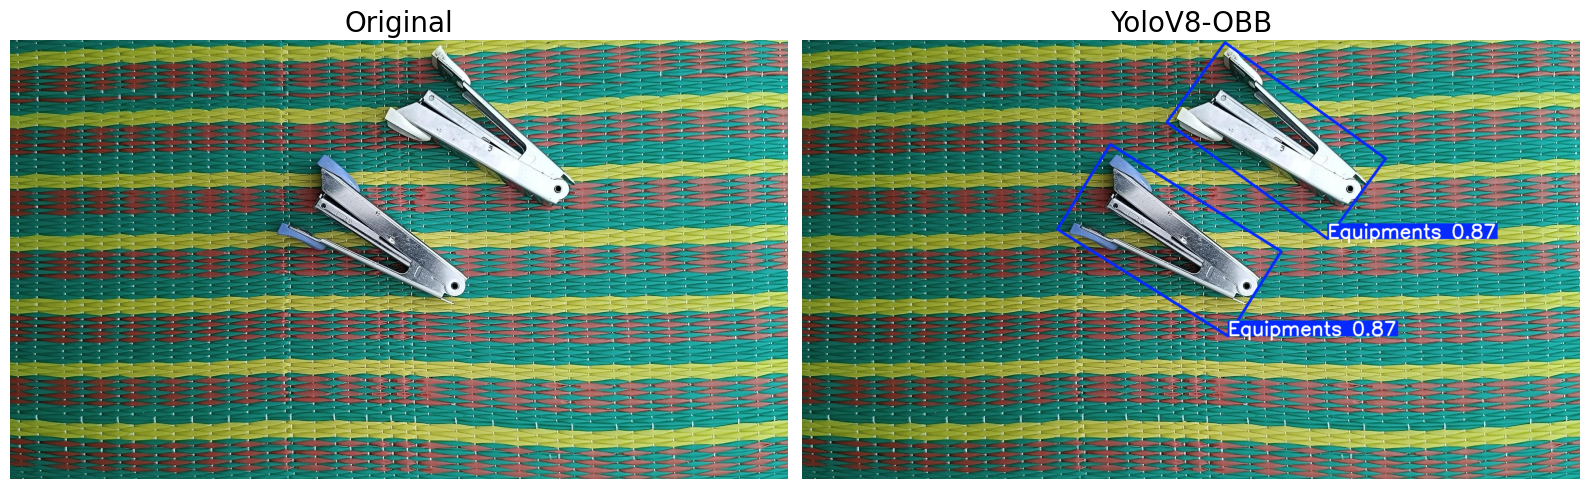

In [8]:
# Test YOLO

def test_yolo(model, test_data):
  tst = test_data[:1]
  print(f"\033[92mTest Images: {len(tst)}\033[0m \n--------------------")

  for img_num, image_path in enumerate(tst):
    image_bgr = cv.imread(image_path)
    if image_bgr is None:
        print(f"Image at path '{image_path}' could not be loaded.")
        continue

    # Run model
    results = model(image_bgr, conf=0.20, save=False, verbose=False)[0]
    # print(len(results))

    # Convert original image for display
    original = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)

    # Plot detection result
    tested_img = results.plot()
    tested_yolo = cv.cvtColor(tested_img, cv.COLOR_BGR2RGB)

    # Plot side-by-side
    display_img = [original, tested_yolo]
    subtitles = ["Original", "YoloV8-OBB"]

    display_detected_images(display_img, subtitles=subtitles)


# Run the Trained YOLO Model
if __name__ == "__main__":
  print("-------------------- \n\033[92mBinary Object Detection - YOLOv8\033[0m \n--------------------")
  test_yolo(yolov8_model, test_images)

---
# Segment Anything
---

In [9]:
image_path = 'datasets/equipmentsOBB/test/images'

In [10]:
def randomly_selected_images(image_path, num_selected=1):
  all_images = [image for image in os.listdir(image_path) if image.lower().endswith((".png",".jpg",".jpeg"))]
  if len(all_images) == 0:
    print("Empty image folder")
    return []

  num_img = min(num_selected, len(all_images))
  selected = random.sample(all_images, num_img)
  print(f"\033[92mSelected {num_img} images:\033[0m {selected}\n--------------------")
  return selected

In [11]:
# Segment Anything by Facebook [SAM Model]
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [12]:
# SAM Masking
def show_mask(mask, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    # ax.imshow(mask_image)
    return mask_image

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [14]:
# SAM Model as Function

def sam_model(image_bgr, boxes_arrays, cenpoint_arrays=None):

  predictor.set_image(image_bgr)
  sam_array = np.zeros((image_bgr.shape[0], image_bgr.shape[1], 3), dtype=np.float32)
  for i, box_array in enumerate(boxes_arrays):
    box_array =  np.array(box_array)
    # print(box_array)

    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=box_array,
        multimask_output=False,
    )

    sam_mask = show_mask(masks)
    sam_mask = np.array(sam_mask)[..., :3]  # Remove alpha
    sam_array += sam_mask

  sam_resize = cv.resize(sam_array, (image_bgr.shape[1], image_bgr.shape[0]))
  sam_resize_uint8 = (sam_resize * 255).astype(np.uint8)

  mask = cv.cvtColor(sam_resize_uint8, cv.COLOR_BGR2RGB)

  plain = np.zeros_like(image_bgr, np.uint8)
  sam_masked = cv.addWeighted(plain, 0.6, mask, 0.4, 0)

  return sam_masked, mask

---
# YoloV8-OBB + SAM Model
---

-------------------- 
Binary Object Detection - YoloV8 + SAM Model 
--------------------
Selected 3 images: ['IMG_20250627_111905_jpg.rf.91f6667ccb01d651277209cefce70939.jpg', 'IMG_20250627_110829_jpg.rf.ecd36ba8dbef96c9f36c9c2d840c1cc0.jpg', 'IMG_20250627_111247_jpg.rf.2ff89d9605d152b6b498091e5742f12d.jpg']
--------------------


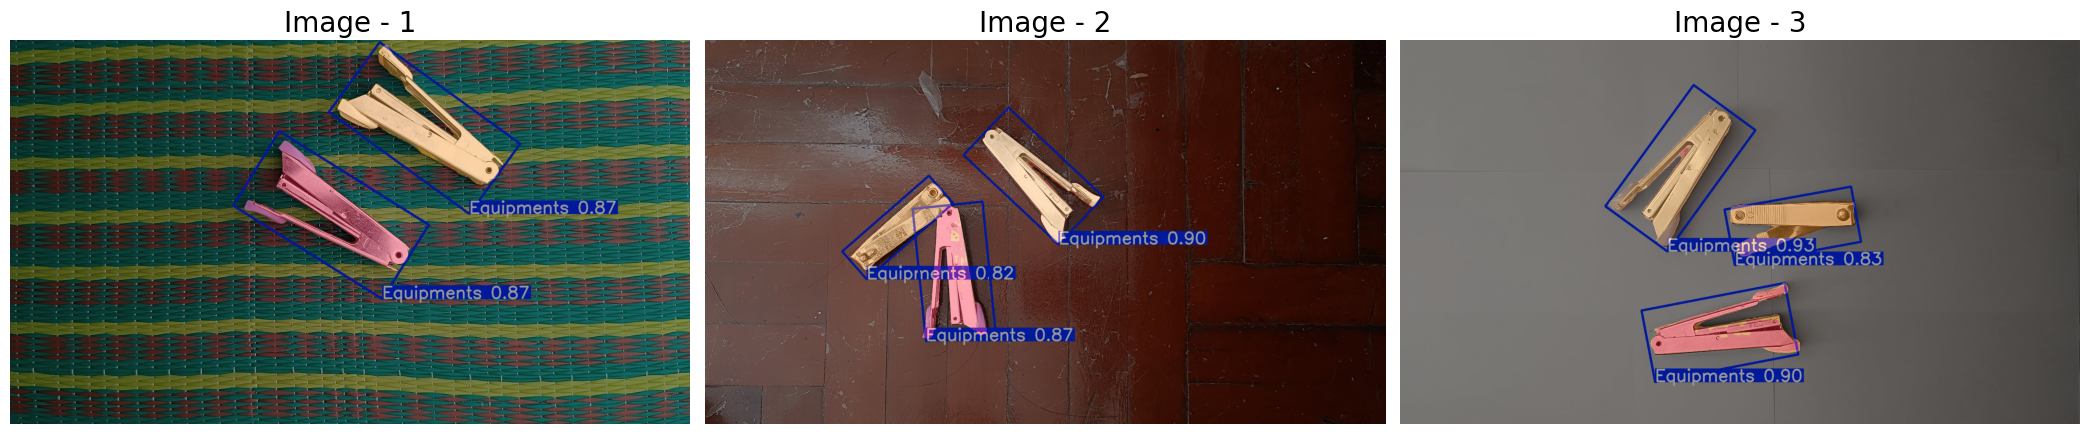

In [16]:
# Only Plot YOLO + SAM [TEST Code]

def yolo_plus_sam_only(model, test_data):
  fig, axes = plt.subplots(1, len(test_data), figsize=(7 * len(test_data), 5))
  if len(test_data) == 1:
    axes = [axes]

  for img_num, image_path in enumerate(test_data):
    image_bgr = cv.imread(image_path)
    if image_bgr is None:
        print(f"Image at path '{image_path}' could not be loaded.")
        continue

    # Run model
    results = model(image_bgr, conf=0.20, save=False, verbose=False)[0]

    tested_img = results.plot()
    tested_yolo = cv.cvtColor(tested_img, cv.COLOR_BGR2RGB)

    boxes_arrays = []

    # print(results.obb.xyxyxyxy)

    x_point = []
    y_point = []

    if results.obb.xyxyxyxy is not None:
      # print(len(results.boxes))

      for box in results.obb.xyxyxyxy:
        # print(box)

        for i in box:
          x_point.append(i[0])
          y_point.append(i[1])

        # print(int(min(x_point)))
        # print(int(max(y_point)))

        boxes_arrays.append([int(min(x_point)), int(min(y_point)), int(max(x_point)), int(max(y_point))])


    predictor.set_image(image_bgr)

    sam_array = np.zeros((image_bgr.shape[0], image_bgr.shape[1], 3), dtype=np.float32)

    for i, box_array in enumerate(boxes_arrays):
      box_array =  np.array(box_array)
      # print(box_array)

      masks, _, _ = predictor.predict(
          point_coords=None,
          point_labels=None,
          box=box_array,
          multimask_output=False,
      )

      sam_mask = show_mask(masks)
      sam_mask = np.array(sam_mask)[..., :3]  # Remove alpha
      sam_array += sam_mask

    sam_resize = cv.resize(sam_array, (image_bgr.shape[1], image_bgr.shape[0]))
    sam_resize_uint8 = (sam_resize * 255).astype(np.uint8)

    mask = cv.cvtColor(sam_resize_uint8, cv.COLOR_BGR2RGB)
    overlay = cv.addWeighted(tested_yolo, 0.6, mask, 0.4, 0)

    # Plot the processed image in the correct subplot
    axes[img_num].imshow(overlay)
    axes[img_num].axis('off')
    axes[img_num].set_title(f"Image - {img_num+1}", fontsize=20)


  plt.tight_layout()
  plt.show()

if __name__ == "__main__":
  print("-------------------- \n\033[92mBinary Object Detection - YoloV8 + SAM Model\033[0m \n--------------------")
  selected_images = randomly_selected_images(image_path, num_selected=3)
  tst = [os.path.join(image_path, f) for f in selected_images]
  yolo_plus_sam_only(yolov8_model, tst)

---
# Visualizing - Orignal, YoloV8, SAM Masking, YoloV8-OBB+SAM [Overlay]

-------------------- 
Binary Object Detection - YOLOv8 + SAM 
--------------------
Selected 1 images: ['IMG_20250627_110431_jpg.rf.8514e4890c18d9f7db56e83e94bb9629.jpg']
--------------------


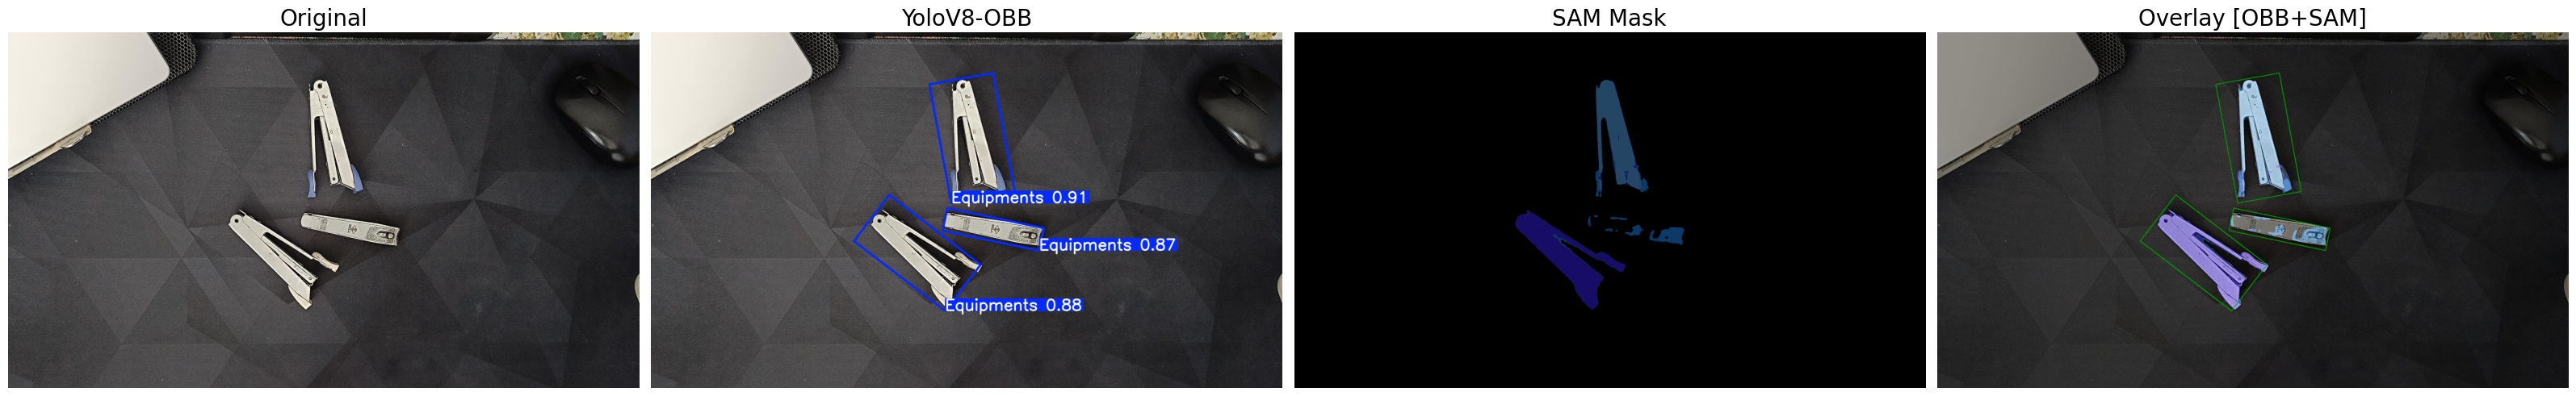

In [25]:
# Yolo Alg Model [TEST]

def visualize_yolo_plus_sam(model, test_data):
  for img_num, image_path in enumerate(test_data):
    image_bgr = cv.imread(image_path)
    if image_bgr is None:
        print(f"Image at path '{image_path}' could not be loaded.")
        continue

    # Run model
    results = model(image_bgr, conf=0.20, save=False, verbose=False)[0]
    # print(len(results))

    # Convert original image for display
    original = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)

    # Plot detection result
    tested_img = results.plot()
    tested_yolo = cv.cvtColor(tested_img, cv.COLOR_BGR2RGB)

    # Draw Rect and Labels
    cnt_img = image_bgr.copy()

    boxes_arrays = []

    if results.obb.xyxyxyxy is not None:
      # print(len(results.boxes))

      x_point = []
      y_point = []
      for box in results.obb.xyxyxyxy:
        # print(box)

        for i in box:
          x_point.append(i[0])
          y_point.append(i[1])

        x_min, x_max = int(min(x_point)), int(max(x_point))
        y_min, y_max = int(min(y_point)), int(max(y_point))

        boxes_arrays.append([x_min, y_min, x_max, y_max])

        # CV Rect Box
        obb_points = np.array(box.cpu().numpy(), dtype=np.int32)
        cv.polylines(cnt_img, [obb_points], True, (0, 255, 0), 2)
      # image_rgb = cv.cvtColor(cnt_img, cv.COLOR_BGR2RGB)

    # SAM Model
    sam_masked, mask = sam_model(image_bgr, boxes_arrays)
    sam_masked = cv.cvtColor(sam_masked, cv.COLOR_BGR2RGB)

    overlay = cv.addWeighted(cnt_img, 0.6, mask, 0.4, 0)
    overlay = cv.cvtColor(overlay, cv.COLOR_BGR2RGB)


    # Plot side-by-side
    display_img = [original, tested_yolo, sam_masked, overlay]
    subtitles = ["Original", "YoloV8-OBB", "SAM Mask", "Overlay [OBB+SAM]"]

    display_detected_images(display_img, subtitles=subtitles)


# Run the Trained YOLO Model
if __name__ == "__main__":
  print("-------------------- \n\033[92mBinary Object Detection - YOLOv8 + SAM\033[0m \n--------------------")
  selected_images = randomly_selected_images(image_path, num_selected=1)
  tst = [os.path.join(image_path, f) for f in selected_images]
  visualize_yolo_plus_sam(yolov8_model, tst)